In [12]:
PROJECT_ROOT = "../"
import sys
# The following line adds the parent directory to the python path.
sys.path.insert(0, PROJECT_ROOT) 

In [13]:
from importlib import reload

import src.experiment.sample_utils as su
import src.experiment.experiment_utils as exp
import src.dataset_handling.pamap.write_pamap as wp
import src.experiment.dataset_experiments.mnist_experiments as m_exp

reload(su)
reload(exp)
reload(wp)
reload(m_exp)

<module 'src.experiment.dataset_experiments.mnist_experiments' from '/home/hphi344/Documents/GS-DBSCAN-Analysis/analysis_notebooks/../src/experiment/dataset_experiments/mnist_experiments.py'>

In [36]:
k = 5
m = 50

eps = 0.11

parquet_name = f"mnist_experiments_{k}_{m}"

In [37]:
params = exp.RunParams(d=784, D=1024, minPts=50, k=k, m=m, eps=eps, alpha=1.2,
                        distancesBatchSize=100, distanceMetric="COSINE",
                        clusterBlockSize=256, clusterOnCpu=True, needToNormalize=True, print_cmd=True,
                        verbose=False, useBatchDbscan=True, timeIt=True, useBatchABMatrices=True,
                        useBatchNorm=True,
                        datasetDType="f16", ABatchSize=10_000, BBatchSize=28, miniBatchSize=10_000, normBatchSize=10_000, ignoreAdjListSymmetry=False)


results = m_exp.run_mnist_samples(params, parquet_name)

Running GS-DBSCAN

/home/hphi344/Documents/GS-DBSCAN-CPP/build-release/GS-DBSCAN --datasetFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f16/mnist8m_sample_n70000_f16.bin --outputFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist8m_sample_n70000_f16_n70000_d784_D1024_mp50_k5_m50_e0.11.json --n 70000 --d 784 --D 1024 --minPts 50 --k 5 --m 50 --eps 0.11 --alpha 1.2 --distancesBatchSize 100 --distanceMetric COSINE --clusterBlockSize 256 --datasetDType f16 --miniBatchSize 10000 --ABatchSize 10000 --BBatchSize 28 --normBatchSize 10000 --sigmaEmbed 1 --clusterOnCpu --needToNormalize --useBatchClustering --useBatchABMatrices --useBatchNorm --timeIt
Standard Output:
 Running GsDBSCAN-CPP
Params: 

## PARAMS ##

Data Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f16/mnist8m_sample_n70000_f16.bin
Output Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist8m_sample_n70000_f16_n70000_d784_D1024_mp5

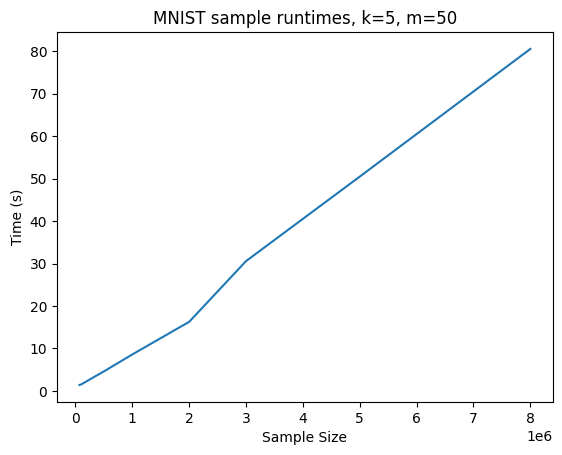

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

results_df = pd.read_parquet(f"/home/hphi344/Documents/GS-DBSCAN-Analysis/results/mnist/samples/{parquet_name}.parquet")

fig, ax = su.plot_sample_time_results(results_df, save_path="plots/MNIST_sample_runtimes.png", title=f"MNIST sample runtimes, k={k}, m={m}")
plt.show()

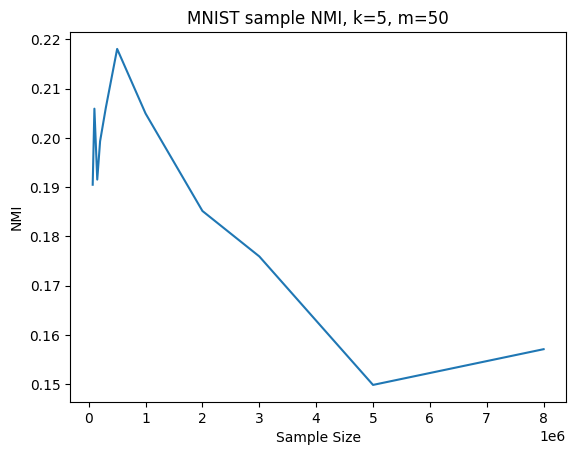

In [32]:
fig, ax = su.plot_sample_nmi_results(results_df, save_path="plots/MNIST_sample_nmi.png", title=f"MNIST sample NMI, k={k}, m={m}")
plt.show()

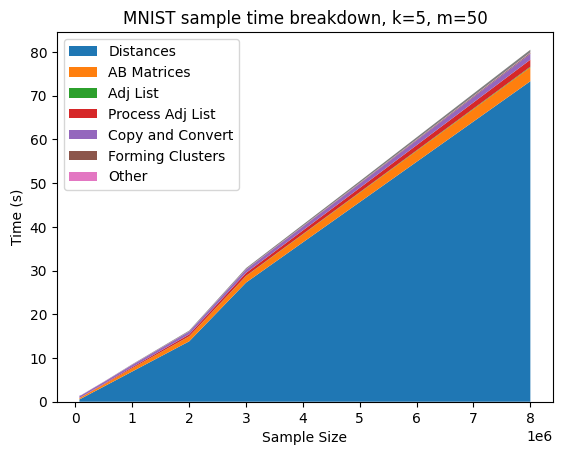

In [33]:
fig, ax = su.plot_sample_time_breakdown(results_df, save_file="MNIST_sample_time_breakdown.png", title=f"MNIST sample time breakdown, k={k}, m={m}")

In [23]:
k_m_values = [(40, 50), (20, 100), (10, 200), (5, 400), (2, 1000), (1, 2000), (2, 2000)]

eps = 0.11

dataset_file = r"/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist/mnist_images_row_major_f16.bin"
labels_file = r"/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist/mnist_labels_f16.bin"

params = exp.RunParams(datasetFilename=dataset_file, labels_filename=labels_file, n=70_000, d=784, D=1024, minPts=50, eps=eps, alpha=1.2,
                        distancesBatchSize=100, distanceMetric="COSINE",
                        clusterBlockSize=256, clusterOnCpu=True, needToNormalize=True, print_cmd=True,
                        verbose=False, useBatchDbscan=True, timeIt=True, useBatchABMatrices=True,
                        useBatchNorm=True,
                        datasetDType="f16", ABatchSize=10_000, BBatchSize=28, miniBatchSize=10_000, normBatchSize=10_000, ignoreAdjListSymmetry=False)

results_df = exp.run_k_m_experiments(k_m_vals=k_m_values, params=params, parquet_name="mnist_k_m_experiments.parquet")

tex = exp.get_k_m_experiements_table(k_m_values, results_df)

Running GS-DBSCAN

/home/hphi344/Documents/GS-DBSCAN-CPP/build-release/GS-DBSCAN --datasetFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist/mnist_images_row_major_f16.bin --outputFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist_images_row_major_f16_n70000_d784_D1024_mp50_k40_m50_e0.11.json --n 70000 --d 784 --D 1024 --minPts 50 --k 40 --m 50 --eps 0.11 --alpha 1.2 --distancesBatchSize 100 --distanceMetric COSINE --clusterBlockSize 256 --datasetDType f16 --miniBatchSize 10000 --ABatchSize 10000 --BBatchSize 28 --normBatchSize 10000 --sigmaEmbed 1 --clusterOnCpu --needToNormalize --useBatchClustering --useBatchABMatrices --useBatchNorm --timeIt
Standard Output:
 Running GsDBSCAN-CPP
Params: 

## PARAMS ##

Data Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist/mnist_images_row_major_f16.bin
Output Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist_images_row_major_f16_n70000_d784_D1024_mp50_k40_m50_e0.11.json
n

In [24]:
print(tex)

\begin{tabular}{cccc}
\toprule
m & k & Time (s) & NMI \\
\midrule
50 & 40 & 4.866891 & 0.339230 \\
100 & 20 & 4.820136 & 0.358509 \\
200 & 10 & 4.923018 & 0.379413 \\
400 & 5 & 5.036126 & 0.397214 \\
1000 & 2 & 5.045484 & 0.406852 \\
2000 & 1 & 5.013765 & 0.409851 \\
2000 & 2 & 9.251704 & 0.424677 \\
\bottomrule
\end{tabular}

